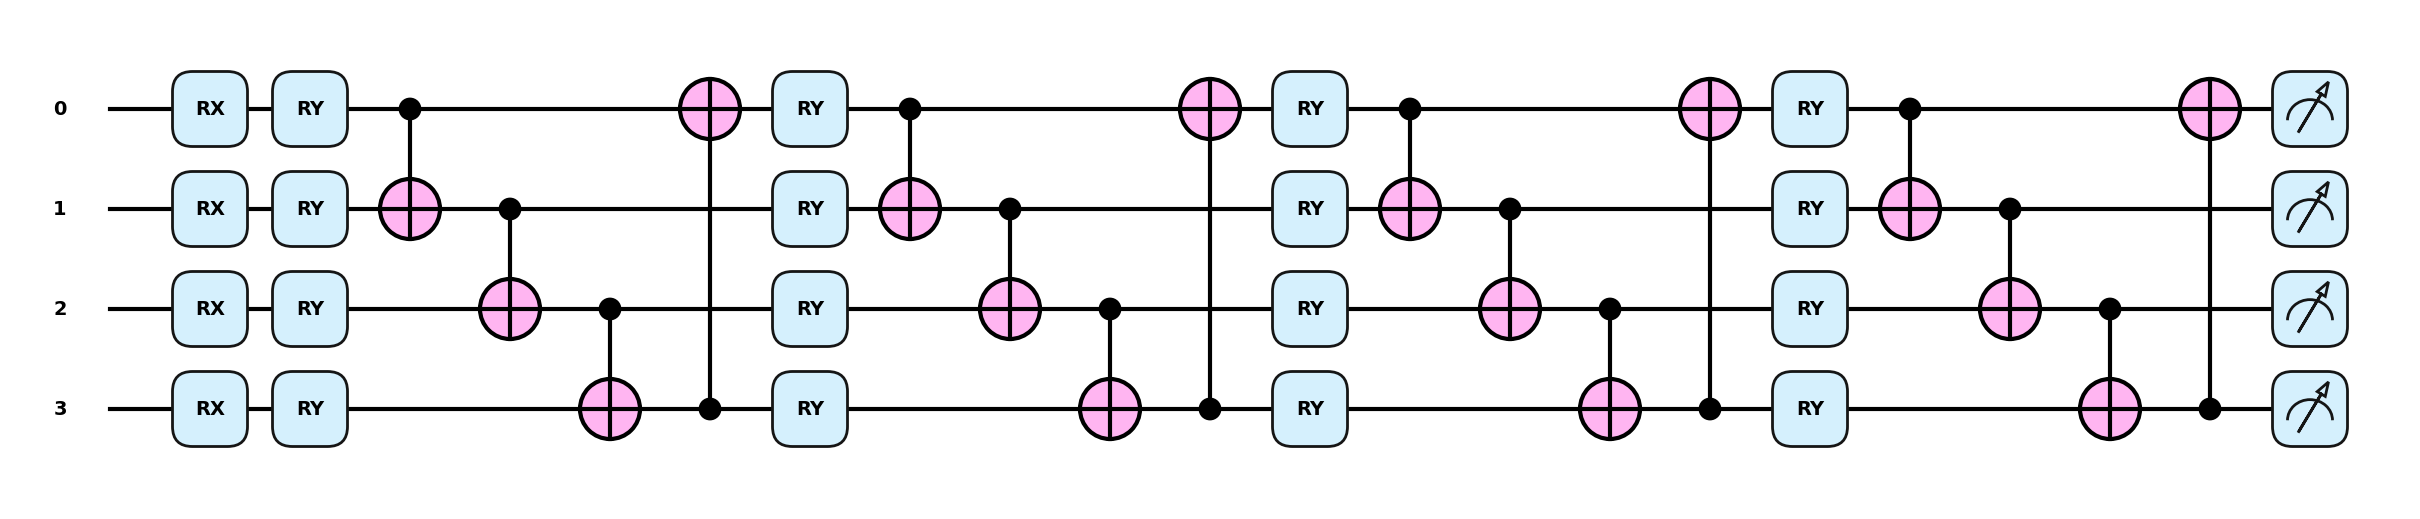

In [9]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Set up the device and QNode
n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.BasicEntanglerLayers(weights, wires=range(n_qubits), rotation=qml.RY)
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

# Generate random inputs and weights for the QNode
inputs = np.random.rand(n_qubits)
weights_0 = np.random.rand(4, n_qubits)  # Assuming 3 layers, 1 parameter per layer

# Visualize the quantum circuit using Matplotlib
qml.drawer.use_style('pennylane')
fig, ax = qml.draw_mpl(qnode, expansion_strategy="device")(inputs, weights_0)
# Show the plot
plt.show()


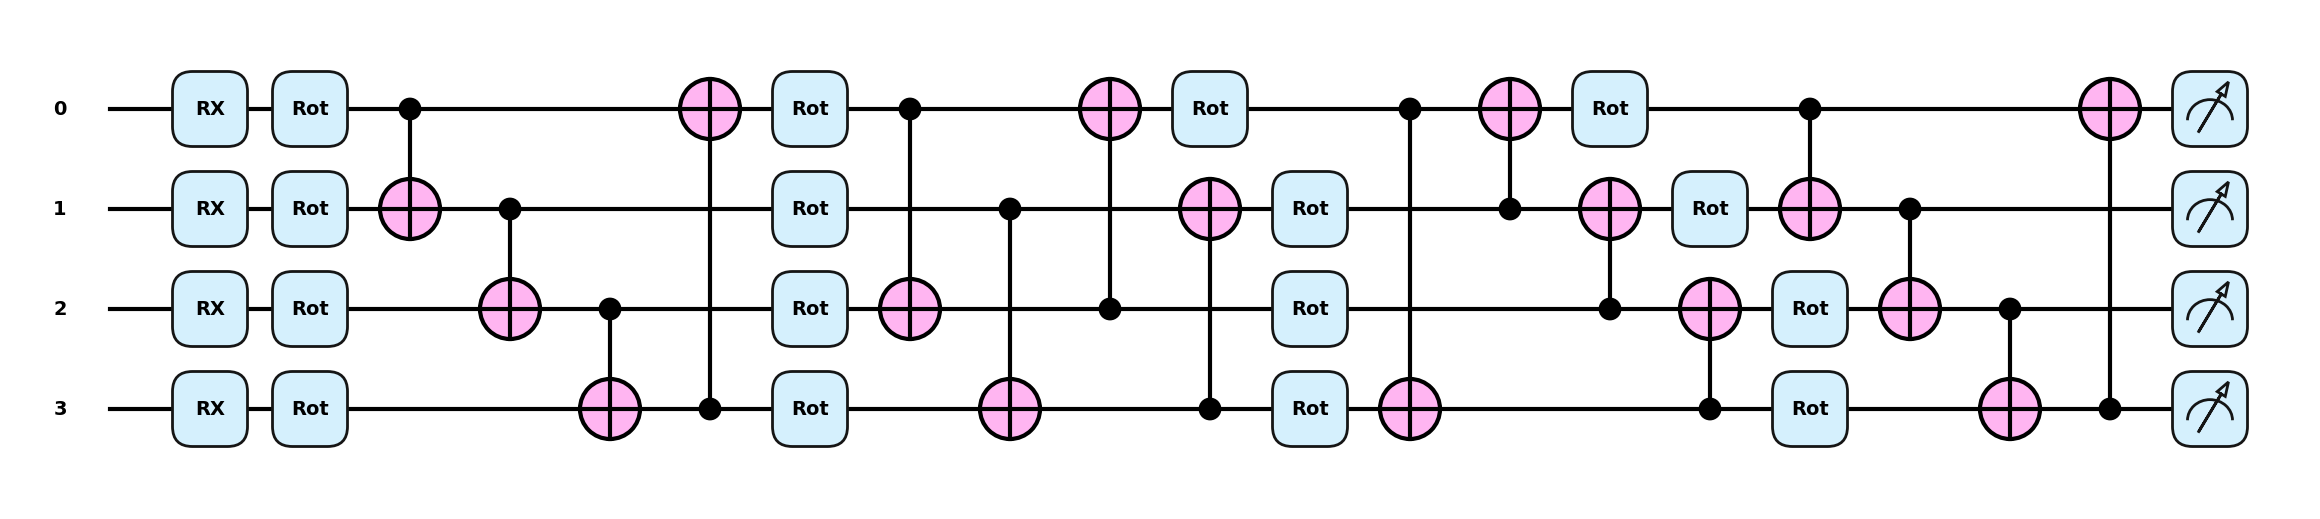

In [12]:
from pennylane import numpy as np
import matplotlib.pyplot as plt

dev = qml.device('default.qubit', wires=4)

@qml.qnode(dev)
def circuit(inputs, parameters):
    qml.AngleEmbedding(inputs, wires=range(4))
    qml.templates.StronglyEntanglingLayers(weights=parameters, wires=range(4))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

# Generate random inputs and weights for the AngleEmbedding and StronglyEntanglingLayers
inputs = np.random.rand(4)
shape = qml.templates.StronglyEntanglingLayers.shape(n_layers=4, n_wires=4)
weights = np.random.random(size=shape)
qml.drawer.use_style('pennylane')

# Visualize the combined circuit
fig, ax = qml.draw_mpl(circuit, expansion_strategy="device")(inputs, weights)

plt.show()



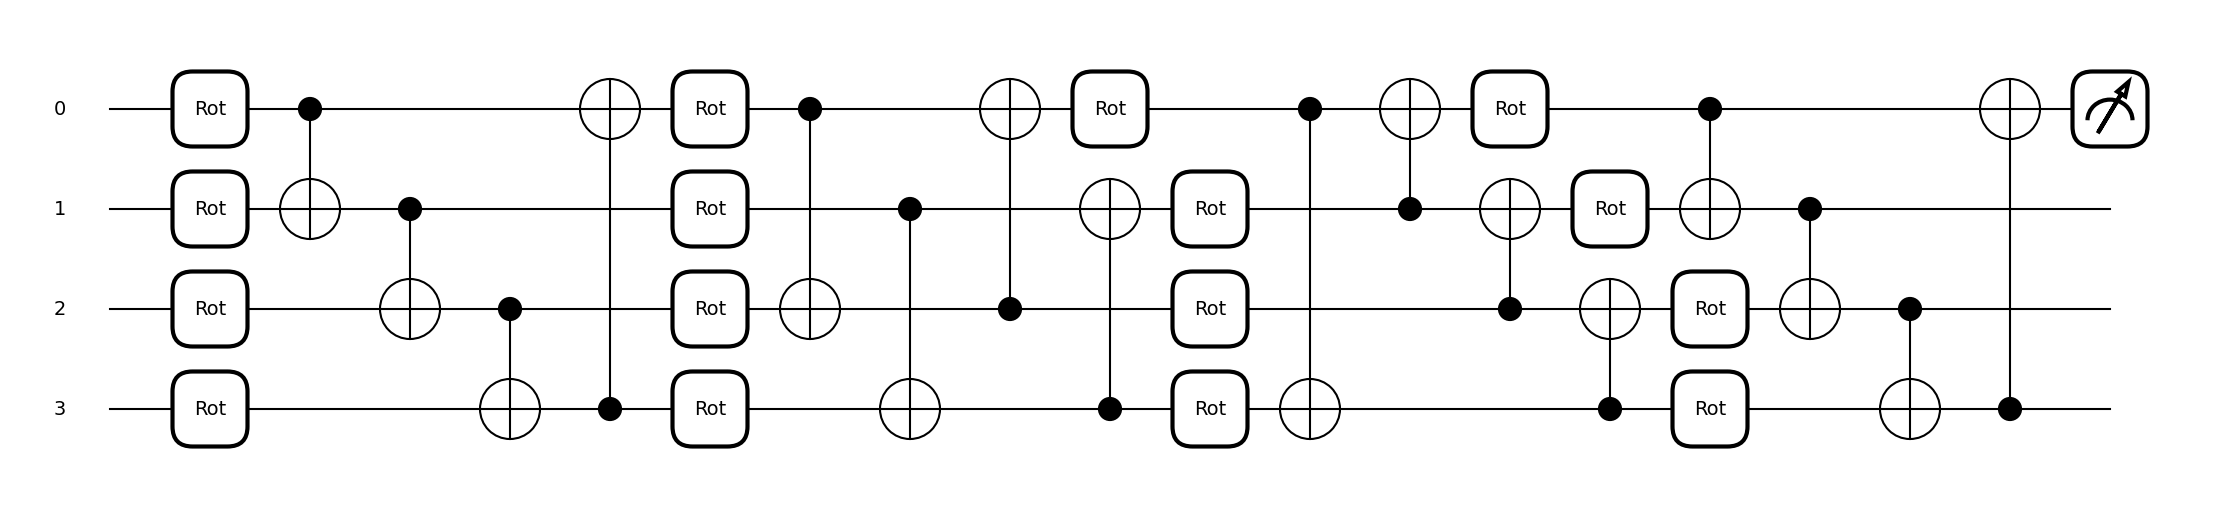

In [106]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

dev = qml.device('default.qubit', wires=4)

@qml.qnode(dev)
def circuit(parameters):
    qml.StronglyEntanglingLayers(weights=parameters, wires=range(4))
    return qml.expval(qml.PauliZ(0))

# Generate random weights for the StronglyEntanglingLayers
shape = qml.StronglyEntanglingLayers.shape(n_layers=4, n_wires=4)
weights = np.random.random(size=shape)

# Visualize only the StronglyEntanglingLayers without Pauli Z-gate
fig, ax = qml.draw_mpl(circuit, expansion_strategy="device")(weights)

# Adjust fontsize for the entire plot
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)  # Set the desired fontsize

plt.show()
